In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
import requests
import lxml.html as lh

In [3]:
#to download data from github for language and countries
URL='https://meta.wikimedia.org/wiki/List_of_Wikipedias'
tables = pd.read_html(URL,match="Admins")
print("There are : ",len(tables)," tables")
print("Take look at table 0")
tables[0]

There are :  9  tables
Take look at table 0


,№,Language,Language (local),Wiki,Articles,Total,Edits,Admins,Users,Active Users,Files,Depth
0,1,English,English,en,6213459,52192556,991192059,1119,40573504,131217,892946,1040
1,2,Cebuano,Sinugboanong Binisaya,ceb,5440995,9993280,30272825,6,74095,160,0,2
2,3,Swedish,Svenska,sv,3494069,7534140,48508312,61,755016,2601,0,9
3,4,German,Deutsch,de,2514073,7004424,205407498,190,3601669,19091,129999,94
4,5,French,Français,fr,2280928,11084097,177490158,159,3964719,20909,63014,239
5,6,Dutch,Nederlands,nl,2043754,4289734,57653624,36,1111079,4107,21,16
6,7,Russian,Русский,ru,1685052,6426172,110950190,83,2888169,11929,229527,137
7,8,Italian,Italiano,it,1660763,6886936,117156488,113,2058438,9154,140371,168
8,9,Spanish,Español,es,1648495,7275181,131447598,67,6068100,16849,0,210
9,10,Polish,Polski,pl,1446350,3324560,61543078,102,1072637,4668,274,31


In [4]:
df = pd.DataFrame()
URL = "https://meta.wikimedia.org/wiki/List_of_Wikipedias"
tables = pd.read_html(URL,match="Admins")
#in order concat differnet tables 
df = pd.concat([i for i in tables], ignore_index=True)
    

In [5]:
df.head()

,№,Language,Language (local),Wiki,Articles,Total,Edits,Admins,Users,Active Users,Files,Depth
0,1.0,English,English,en,6213459,52192556,991192059,1119,40573504,131217.0,892946,1040
1,2.0,Cebuano,Sinugboanong Binisaya,ceb,5440995,9993280,30272825,6,74095,160.0,0,2
2,3.0,Swedish,Svenska,sv,3494069,7534140,48508312,61,755016,2601.0,0,9
3,4.0,German,Deutsch,de,2514073,7004424,205407498,190,3601669,19091.0,129999,94
4,5.0,French,Français,fr,2280928,11084097,177490158,159,3964719,20909.0,63014,239


In [6]:
df.shape

(315, 12)

In [7]:
df.Language.value_counts()

Tagalog              1
Sardinian            1
Mirandese            1
Aymara               1
Aragonese            1
                    ..
Nepali               1
Saterland Frisian    1
Russian              1
Kinyarwanda          1
Fula                 1
Name: Language, Length: 314, dtype: int64

In [8]:
df.Language.nunique()

314

In [9]:
df.Wiki.nunique()

314

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   №                 314 non-null    float64
 1   Language          314 non-null    object 
 2   Language (local)  314 non-null    object 
 3   Wiki              314 non-null    object 
 4   Articles          315 non-null    object 
 5   Total             315 non-null    object 
 6   Edits             315 non-null    object 
 7   Admins            315 non-null    object 
 8   Users             315 non-null    object 
 9   Active Users      314 non-null    float64
 10  Files             315 non-null    object 
 11  Depth             314 non-null    object 
dtypes: float64(2), object(10)
memory usage: 29.7+ KB


In [11]:
#changing var type of some variables for wiki row dataframe
df[['Articles',
 'Total',
 'Edits',
 'Admins',
 'Users',
 ]] = df[['Articles',
 'Total',
 'Edits',
 'Admins',
 'Users',
]].astype('int')

In [12]:
df_ = df.groupby('Language').mean()

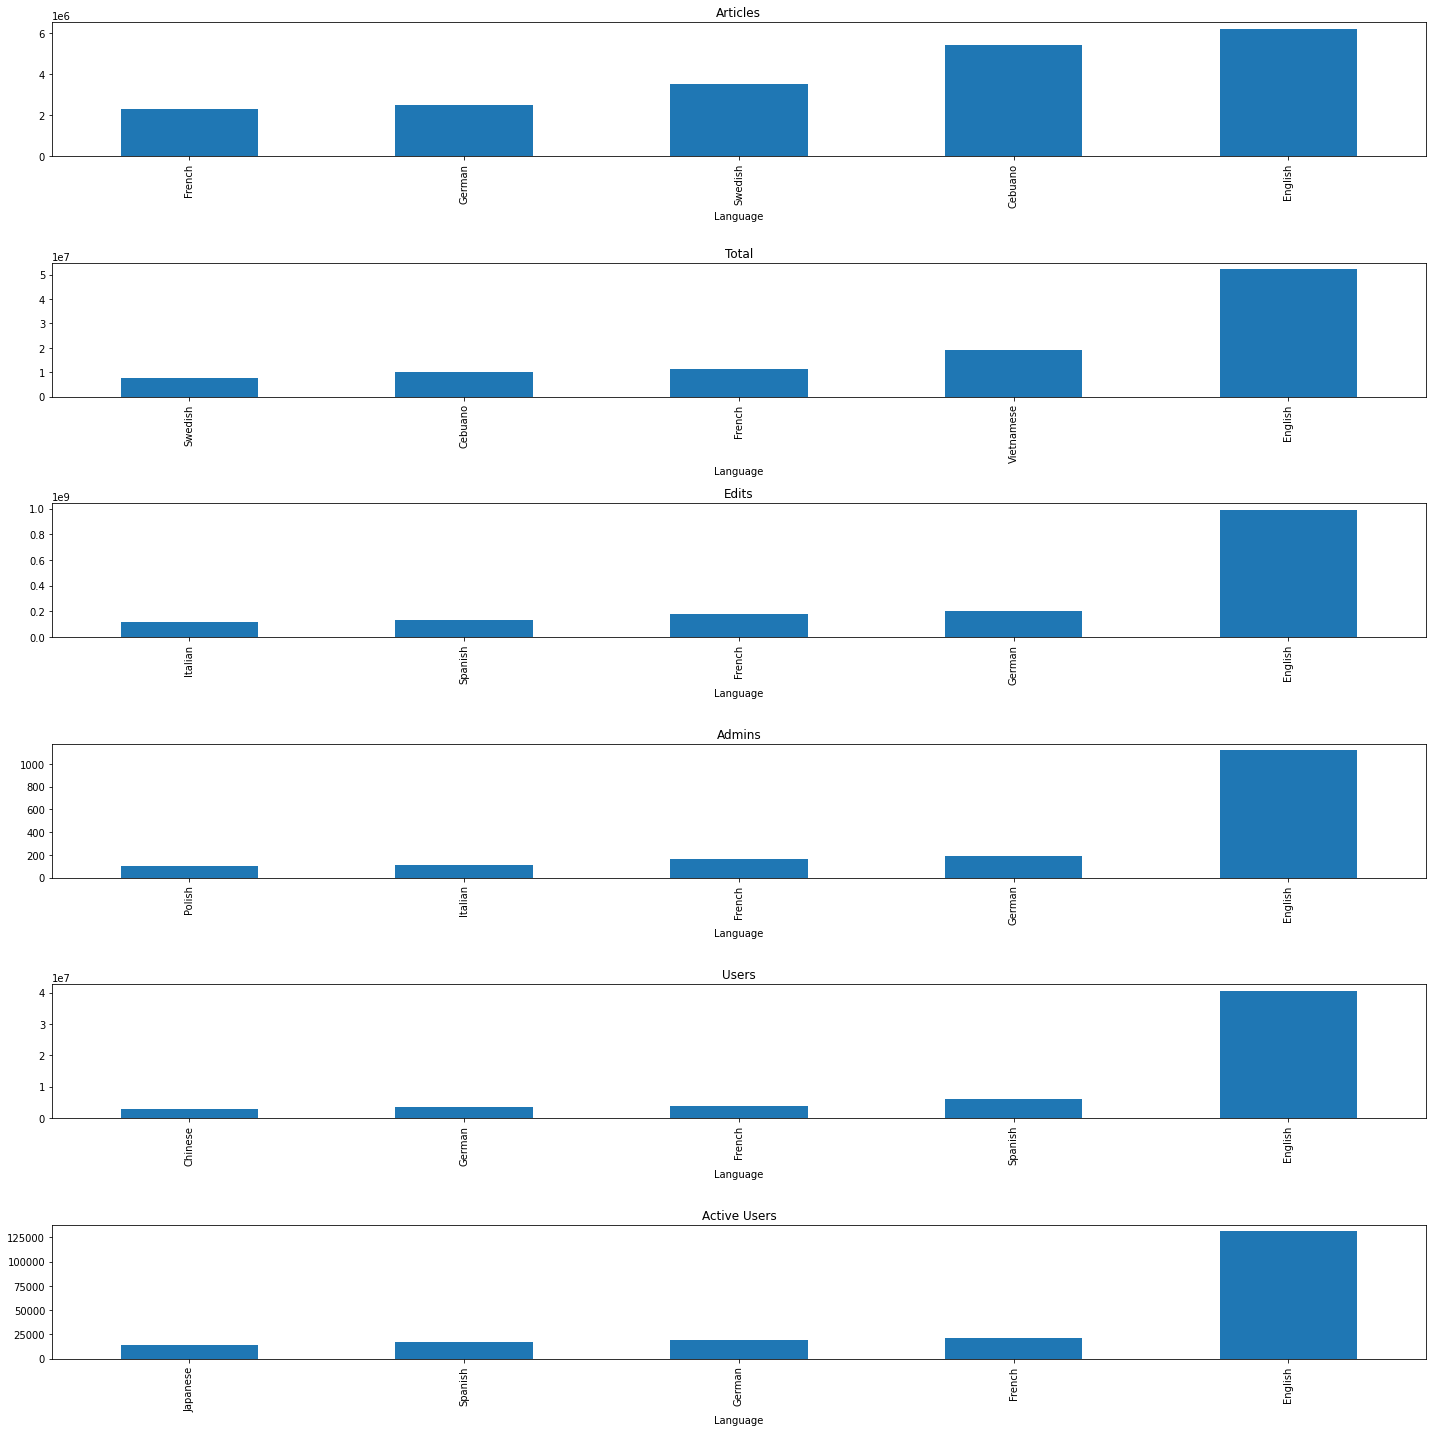

In [13]:
#visualize groups by languages for row datafrome
fig, (ax0, ax1, ax2, ax3,ax4,ax5) = plt.subplots(nrows=6, ncols=1, figsize=(20, 20))
df_['Articles'].sort_values().tail(5).plot.bar(ax=ax0)
ax0.set_title('Articles')
df_['Total'].sort_values().tail(5).plot.bar(ax=ax1)
ax1.set_title('Total')
df_['Edits'].sort_values().tail(5).plot.bar(ax=ax2)
ax2.set_title('Edits')
df_['Admins'].sort_values().tail(5).plot.bar(ax=ax3)
ax3.set_title('Admins')
df_['Users'].sort_values().tail(5).plot.bar(ax=ax4)
ax4.set_title('Users')
df_['Active Users'].sort_values().tail(5).plot.bar(ax=ax5)
ax5.set_title('Active Users')
plt.tight_layout()

In [14]:
df_.describe()

,№,Articles,Total,Edits,Admins,Users,Active Users
count,314.000000,3.140000e+02,3.140000e+02,3.140000e+02,314.000000,3.140000e+02,314.000000
mean,157.500000,1.767198e+05,7.245290e+05,9.203340e+06,12.493631,2.970282e+05,1025.267516
std,90.788215,6.013041e+05,3.434858e+06,5.968105e+07,65.578587,2.352473e+06,7745.191565
min,1.000000,0.000000e+00,1.140000e+02,3.548000e+03,1.000000,5.690000e+02,0.000000
25%,79.250000,1.975500e+03,6.276750e+03,6.432175e+04,2.000000,9.140750e+03,16.000000
50%,157.500000,8.327000e+03,2.036650e+04,2.067475e+05,3.000000,1.809600e+04,28.000000
75%,235.750000,7.209000e+04,1.807692e+05,1.667120e+06,7.000000,6.039775e+04,110.500000
max,314.000000,6.213459e+06,5.219256e+07,9.911921e+08,1119.000000,4.057350e+07,131217.000000


<AxesSubplot:>

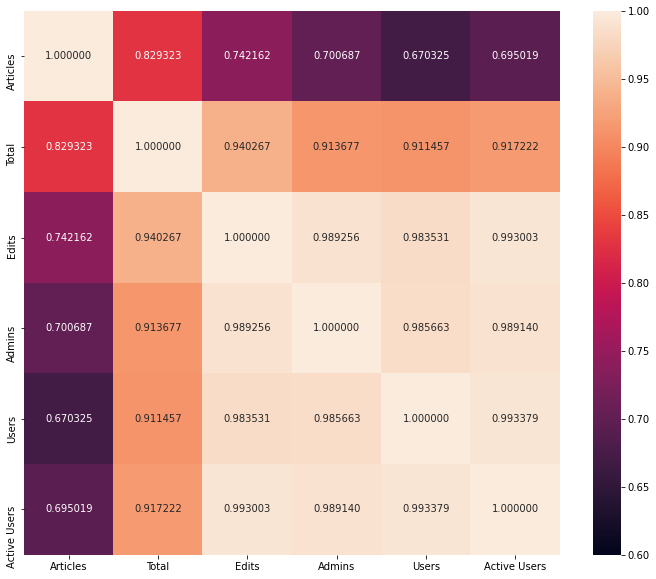

In [15]:
plt.figure(figsize=(12,10))
sns.heatmap(df_.drop('№', axis=1).corr(), annot=True, vmin=0.600, vmax=1.000,fmt='f')

In [16]:
#to download data from github for language and countries
url = 'https://raw.githubusercontent.com/annexare/Countries/master/data/countries.json'
count_lang = pd.read_json(url).T

In [17]:
count_lang.head()

,name,native,phone,continent,capital,currency,languages
AD,Andorra,Andorra,376,EU,Andorra la Vella,EUR,[ca]
AE,United Arab Emirates,دولة الإمارات العربية المتحدة,971,AS,Abu Dhabi,AED,[ar]
AF,Afghanistan,افغانستان,93,AS,Kabul,AFN,"[ps, uz, tk]"
AG,Antigua and Barbuda,Antigua and Barbuda,1268,NA,Saint John's,XCD,[en]
AI,Anguilla,Anguilla,1264,NA,The Valley,XCD,[en]


In [18]:
count_lang.languages.value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[en]                50
[fr]                20
[es]                16
[ar]                16
[pt]                 8
                    ..
[es, en]             1
[en, fj, hi, ur]     1
[ne]                 1
[ca]                 1
[en, ss]             1
Name: languages, Length: 126, dtype: int64

In [19]:
#to check if there is any empty list at languages column
count_lang[count_lang.languages.apply(lambda x: len(x)<1)]

,name,native,phone,continent,capital,currency,languages
AQ,Antarctica,Antarctica,672,AN,,,[]


In [20]:
#drop Antarctica
count_lang.drop('AQ', inplace=True)

In [21]:
#to get first value from the list at languages column
count_lang['first_language']=count_lang.languages.apply(lambda x: x[0])

In [22]:
count_lang.sample(10)

,name,native,phone,continent,capital,currency,languages,first_language
NO,Norway,Norge,47,EU,Oslo,NOK,"[no, nb, nn]",no
TO,Tonga,Tonga,676,OC,Nuku'alofa,TOP,"[en, to]",en
JO,Jordan,الأردن,962,AS,Amman,JOD,[ar],ar
EC,Ecuador,Ecuador,593,SA,Quito,USD,[es],es
AL,Albania,Shqipëria,355,EU,Tirana,ALL,[sq],sq
ZA,South Africa,South Africa,27,AF,Pretoria,ZAR,"[af, en, nr, st, ss, tn, ts, ve, xh, zu]",af
BM,Bermuda,Bermuda,1441,NA,Hamilton,BMD,[en],en
MV,Maldives,Maldives,960,AS,Malé,MVR,[dv],dv
FR,France,France,33,EU,Paris,EUR,[fr],fr
MN,Mongolia,Монгол улс,976,AS,Ulan Bator,MNT,[mn],mn


In [23]:
#to assign a country for each wiki language
wiki = pd.merge(count_lang, df, right_on='Wiki', left_on='first_language' )

In [24]:
#to remove some feature of count_lang from wiki
list(count_lang.columns)

['name',
 'native',
 'phone',
 'continent',
 'capital',
 'currency',
 'languages',
 'first_language']

In [25]:
#dropping some features
wiki.drop([
 'native',
 'phone',
 'capital',
 'currency',
 'languages',
 'first_language'], axis=1, inplace=True)

In [26]:
wiki.sample(10)

,name,continent,№,Language,Language (local),Wiki,Articles,Total,Edits,Admins,Users,Active Users,Files,Depth
149,Saint Barthélemy,NA,5.0,French,Français,fr,2280928,11084097,177490158,159,3964719,20909.0,63014,239
140,Sint Maarten,NA,6.0,Dutch,Nederlands,nl,2043754,4289734,57653624,36,1111079,4107.0,21,16
15,Qatar,AS,16.0,Arabic,العربية,ar,1095998,7061800,51974183,26,1974729,6173.0,38192,218
182,Bouvet Island,AN,23.0,Norwegian (Bokmål),Norsk (Bokmål),no,546884,1496642,20969203,37,510205,1322.0,4,42
63,Northern Mariana Islands,OC,1.0,English,English,en,6213459,52192556,991192059,1119,40573504,131217.0,892946,1040
91,United States,NA,1.0,English,English,en,6213459,52192556,991192059,1119,40573504,131217.0,892946,1040
106,São Tomé and Príncipe,AF,18.0,Portuguese,Português,pt,1049792,5111869,59894891,72,2508721,9733.0,57168,175
244,Uzbekistan,AS,59.0,Uzbek,O‘zbek,uz,139189,632318,2155577,11,58200,359.0,1556,43
229,Malta,EU,207.0,Maltese,Malti,mt,3649,16211,259142,5,17667,48.0,1149,189
222,Moldova,EU,30.0,Romanian,Română,ro,414615,2250482,13716159,19,540122,1124.0,38357,119


In [27]:
wiki.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 0 to 248
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              249 non-null    object 
 1   continent         249 non-null    object 
 2   №                 249 non-null    float64
 3   Language          249 non-null    object 
 4   Language (local)  249 non-null    object 
 5   Wiki              249 non-null    object 
 6   Articles          249 non-null    int64  
 7   Total             249 non-null    int64  
 8   Edits             249 non-null    int64  
 9   Admins            249 non-null    int64  
 10  Users             249 non-null    int64  
 11  Active Users      249 non-null    float64
 12  Files             249 non-null    object 
 13  Depth             249 non-null    object 
dtypes: float64(2), int64(5), object(7)
memory usage: 29.2+ KB


In [28]:
#to change some feature from wiki
list(wiki.columns)

['name',
 'continent',
 '№',
 'Language',
 'Language (local)',
 'Wiki',
 'Articles',
 'Total',
 'Edits',
 'Admins',
 'Users',
 'Active Users',
 'Files',
 'Depth']

In [29]:
#dropping 'No' feature from wiki
wiki.drop('№', axis=1, inplace=True)

In [30]:
#groupping by language 
wiki_language = wiki.groupby('Language').mean()
wiki_language

,Articles,Total,Edits,Admins,Users,Active Users
Language,,,,,,
Afrikaans,95351,346908,2349566,18,130452,193.0
Albanian,81860,243347,2164347,13,128312,318.0
Amharic,14905,45652,361612,3,33474,42.0
Arabic,1095998,7061800,51974183,26,1974729,6173.0
Armenian,279273,943833,7568883,11,105107,663.0
...,...,...,...,...,...,...
Turkish,384794,1923748,24409646,26,1250509,3497.0
Turkmen,5852,14010,214633,1,20705,45.0
Ukrainian,1063037,3650562,30310345,47,536956,3620.0


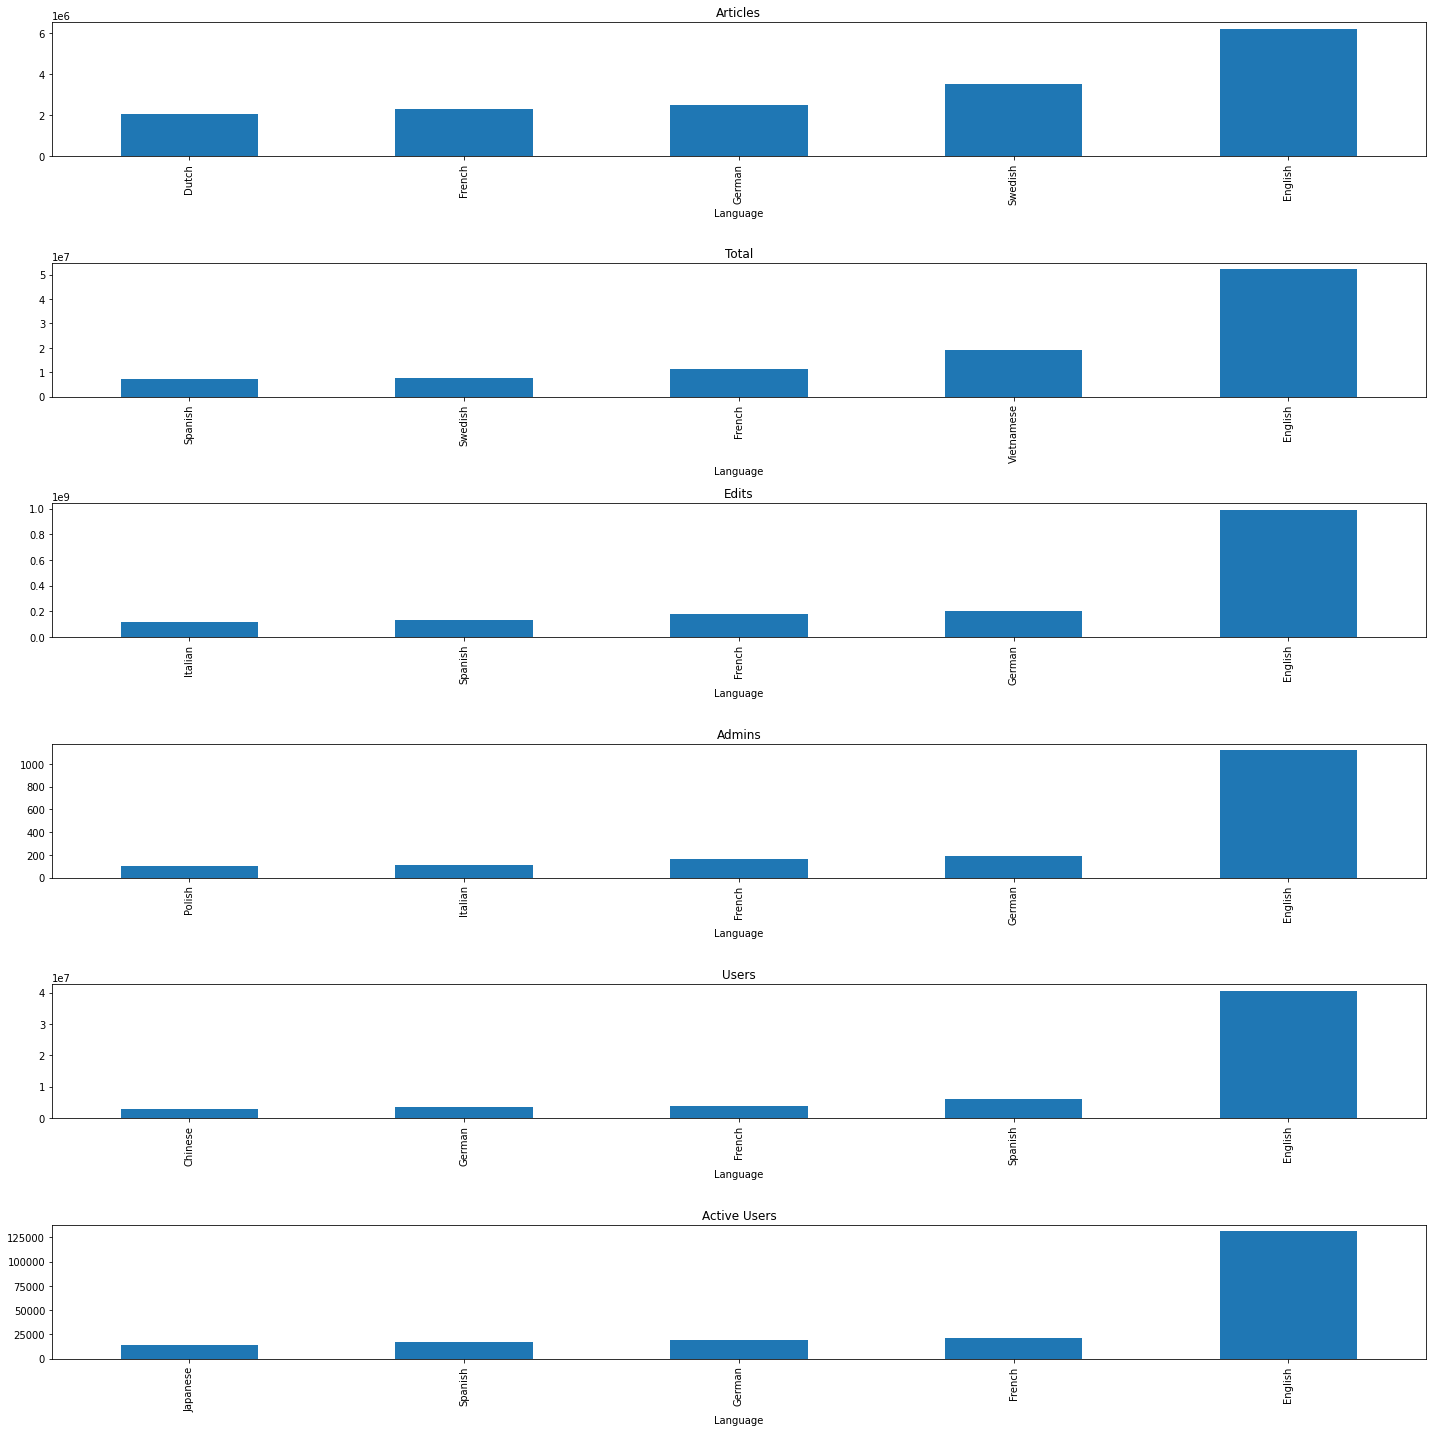

In [31]:
#visualize groups by languages for merged dataframe
fig, (ax0, ax1, ax2, ax3,ax4,ax5) = plt.subplots(nrows=6, ncols=1, figsize=(20, 20))
wiki_language['Articles'].sort_values().tail(5).plot.bar(ax=ax0)
ax0.set_title('Articles')
wiki_language['Total'].sort_values().tail(5).plot.bar(ax=ax1)
ax1.set_title('Total')
wiki_language['Edits'].sort_values().tail(5).plot.bar(ax=ax2)
ax2.set_title('Edits')
wiki_language['Admins'].sort_values().tail(5).plot.bar(ax=ax3)
ax3.set_title('Admins')
wiki_language['Users'].sort_values().tail(5).plot.bar(ax=ax4)
ax4.set_title('Users')
wiki_language['Active Users'].sort_values().tail(5).plot.bar(ax=ax5)
ax5.set_title('Active Users')
plt.tight_layout()

In [32]:
#to download data from github for population and countries
url = 'https://raw.githubusercontent.com/datasets/population/master/data/population.csv'
pop = pd.read_csv(url)
pop

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1960,92197753
1,Arab World,ARB,1961,94724510
2,Arab World,ARB,1962,97334442
3,Arab World,ARB,1963,100034179
4,Arab World,ARB,1964,102832760
...,...,...,...,...
15404,Zimbabwe,ZWE,2014,13586681
15405,Zimbabwe,ZWE,2015,13814629
15406,Zimbabwe,ZWE,2016,14030390
15407,Zimbabwe,ZWE,2017,14236745


In [33]:
#getting population from 2o18
pop=pop[pop['Year']==2018]
pop

,Country Name,Country Code,Year,Value
58,Arab World,ARB,2018,419790588
117,Caribbean small states,CSS,2018,7358965
176,Central Europe and the Baltics,CEB,2018,102511922
235,Early-demographic dividend,EAR,2018,3249140605
294,East Asia & Pacific,EAS,2018,2328220870
...,...,...,...,...
15202,Virgin Islands (U.S.),VIR,2018,106977
15231,West Bank and Gaza,PSE,2018,4569087
15290,"Yemen, Rep.",YEM,2018,28498687
15349,Zambia,ZMB,2018,17351822


In [34]:
#dropping 'Country Code' feature from pop
pop.drop('Country Code', axis=1, inplace=True)
pop

/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Country Name,Year,Value
58,Arab World,2018,419790588
117,Caribbean small states,2018,7358965
176,Central Europe and the Baltics,2018,102511922
235,Early-demographic dividend,2018,3249140605
294,East Asia & Pacific,2018,2328220870
...,...,...,...
15202,Virgin Islands (U.S.),2018,106977
15231,West Bank and Gaza,2018,4569087
15290,"Yemen, Rep.",2018,28498687
15349,Zambia,2018,17351822


In [35]:
#renaming 'Value' as 'population'
pop.rename(columns={'Value':'population'}, inplace=True)
pop

/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Country Name,Year,population
58,Arab World,2018,419790588
117,Caribbean small states,2018,7358965
176,Central Europe and the Baltics,2018,102511922
235,Early-demographic dividend,2018,3249140605
294,East Asia & Pacific,2018,2328220870
...,...,...,...
15202,Virgin Islands (U.S.),2018,106977
15231,West Bank and Gaza,2018,4569087
15290,"Yemen, Rep.",2018,28498687
15349,Zambia,2018,17351822


In [36]:
#to assign a population of country for each wiki language
wiki=pd.merge(wiki, pop, right_on='Country Name', left_on='name')
wiki

,name,continent,Language,Language (local),Wiki,Articles,Total,Edits,Admins,Users,Active Users,Files,Depth,Country Name,Year,population
0,Andorra,EU,Catalan,Català,ca,666582,1645144,25719296,22,373341,1669.0,13635,34,Andorra,2018,77006
1,United Arab Emirates,AS,Arabic,العربية,ar,1095998,7061800,51974183,26,1974729,6173.0,38192,218,United Arab Emirates,2018,9630959
2,Bahrain,AS,Arabic,العربية,ar,1095998,7061800,51974183,26,1974729,6173.0,38192,218,Bahrain,2018,1569439
3,Algeria,AF,Arabic,العربية,ar,1095998,7061800,51974183,26,1974729,6173.0,38192,218,Algeria,2018,42228429
4,Iraq,AS,Arabic,العربية,ar,1095998,7061800,51974183,26,1974729,6173.0,38192,218,Iraq,2018,38433600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,Uzbekistan,AS,Uzbek,O‘zbek,uz,139189,632318,2155577,11,58200,359.0,1556,43,Uzbekistan,2018,32955400
179,Vietnam,AS,Vietnamese,Tiếng Việt,vi,1259938,19218526,64118564,20,779402,2097.0,22452,--,Vietnam,2018,95540395
180,Vanuatu,OC,Bislama,Bislama,bi,1243,2989,38459,1,10330,16.0,0,25,Vanuatu,2018,292680
181,Samoa,OC,Samoan,Gagana Samoa,sm,975,3063,41019,1,8483,12.0,0,61,Samoa,2018,196130


In [37]:
#groupping by language 
df_wiki = wiki.groupby('Language').mean()[['Articles','Total','Edits','Admins','Users','Active Users']]
df_wiki

,Articles,Total,Edits,Admins,Users,Active Users
Language,,,,,,
Afrikaans,95351.0,346908.0,2349566.0,18.0,130452.0,193.0
Albanian,81860.0,243347.0,2164347.0,13.0,128312.0,318.0
Amharic,14905.0,45652.0,361612.0,3.0,33474.0,42.0
Arabic,1095998.0,7061800.0,51974183.0,26.0,1974729.0,6173.0
Armenian,279273.0,943833.0,7568883.0,11.0,105107.0,663.0
...,...,...,...,...,...,...
Turkish,384794.0,1923748.0,24409646.0,26.0,1250509.0,3497.0
Turkmen,5852.0,14010.0,214633.0,1.0,20705.0,45.0
Ukrainian,1063037.0,3650562.0,30310345.0,47.0,536956.0,3620.0


In [38]:
#adding population as sum to dataframe 
df_wiki['pop_total']=wiki.groupby('Language').sum()[['population']]
df_wiki

,Articles,Total,Edits,Admins,Users,Active Users,pop_total
Language,,,,,,,
Afrikaans,95351.0,346908.0,2349566.0,18.0,130452.0,193.0,57779622
Albanian,81860.0,243347.0,2164347.0,13.0,128312.0,318.0,4711676
Amharic,14905.0,45652.0,361612.0,3.0,33474.0,42.0,109224559
Arabic,1095998.0,7061800.0,51974183.0,26.0,1974729.0,6173.0,255425862
Armenian,279273.0,943833.0,7568883.0,11.0,105107.0,663.0,2951776
...,...,...,...,...,...,...,...
Turkish,384794.0,1923748.0,24409646.0,26.0,1250509.0,3497.0,82319724
Turkmen,5852.0,14010.0,214633.0,1.0,20705.0,45.0,5850908
Ukrainian,1063037.0,3650562.0,30310345.0,47.0,536956.0,3620.0,44622516


In [39]:
#finding ratio of each colums to population total
df_wiki['ratio_Total']= df_wiki['Total']/df_wiki['pop_total']
df_wiki['ratio_Articles']= df_wiki['Articles']/df_wiki['pop_total']
df_wiki['ratio_Edits']= df_wiki['Edits']/df_wiki['pop_total']
df_wiki['ratio_Admins']= df_wiki['Admins']/df_wiki['pop_total']
df_wiki['ratio_Users']= df_wiki['Users']/df_wiki['pop_total']
df_wiki['ratio_Active_Users']= df_wiki['Active Users']/df_wiki['pop_total']

In [40]:
df_wiki

,Articles,Total,Edits,Admins,Users,Active Users,pop_total,ratio_Total,ratio_Articles,ratio_Edits,ratio_Admins,ratio_Users,ratio_Active_Users
Language,,,,,,,,,,,,,
Afrikaans,95351.0,346908.0,2349566.0,18.0,130452.0,193.0,57779622,0.006004,0.001650,0.040664,3.115285e-07,0.002258,3.340278e-06
Albanian,81860.0,243347.0,2164347.0,13.0,128312.0,318.0,4711676,0.051648,0.017374,0.459358,2.759103e-06,0.027233,6.749191e-05
Amharic,14905.0,45652.0,361612.0,3.0,33474.0,42.0,109224559,0.000418,0.000136,0.003311,2.746635e-08,0.000306,3.845289e-07
Arabic,1095998.0,7061800.0,51974183.0,26.0,1974729.0,6173.0,255425862,0.027647,0.004291,0.203481,1.017908e-07,0.007731,2.416748e-05
Armenian,279273.0,943833.0,7568883.0,11.0,105107.0,663.0,2951776,0.319751,0.094612,2.564179,3.726570e-06,0.035608,2.246105e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Turkish,384794.0,1923748.0,24409646.0,26.0,1250509.0,3497.0,82319724,0.023369,0.004674,0.296522,3.158417e-07,0.015191,4.248071e-05
Turkmen,5852.0,14010.0,214633.0,1.0,20705.0,45.0,5850908,0.002395,0.001000,0.036684,1.709136e-07,0.003539,7.691114e-06
Ukrainian,1063037.0,3650562.0,30310345.0,47.0,536956.0,3620.0,44622516,0.081810,0.023823,0.679261,1.053280e-06,0.012033,8.112496e-05


In [41]:
df_wiki.sort_values('ratio_Articles', ascending=False).head(50)

,Articles,Total,Edits,Admins,Users,Active Users,pop_total,ratio_Total,ratio_Articles,ratio_Edits,ratio_Admins,ratio_Users,ratio_Active_Users
Language,,,,,,,,,,,,,
Catalan,666582.0,1645144.0,25719296.0,22.0,373341.0,1669.0,77006,21.363842,8.656235,333.990806,2.856920e-04,4.848207,0.021674
Swedish,3494069.0,7534140.0,48508312.0,61.0,755016.0,2601.0,10175214,0.740440,0.343390,4.767301,5.994960e-06,0.074201,0.000256
Faroese,13461.0,39611.0,361776.0,4.0,23847.0,43.0,48497,0.816772,0.277564,7.459760,8.247933e-05,0.491721,0.000887
Estonian,214271.0,511379.0,5772042.0,33.0,146570.0,685.0,1321977,0.386829,0.162084,4.366220,2.496261e-05,0.110872,0.000518
Icelandic,51316.0,134393.0,1690860.0,29.0,76565.0,167.0,352721,0.381018,0.145486,4.793761,8.221796e-05,0.217070,0.000473
Norwegian (Bokmål),546884.0,1496642.0,20969203.0,37.0,510205.0,1322.0,5311916,0.281752,0.102954,3.947578,6.965472e-06,0.096049,0.000249
Armenian,279273.0,943833.0,7568883.0,11.0,105107.0,663.0,2951776,0.319751,0.094612,2.564179,3.726570e-06,0.035608,0.000225
Finnish,499411.0,1325272.0,19380225.0,33.0,466828.0,1700.0,5515525,0.240280,0.090546,3.513759,5.983111e-06,0.084639,0.000308
Serbian,641325.0,3935922.0,23470937.0,20.0,276106.0,978.0,7604831,0.517555,0.084331,3.086319,2.629907e-06,0.036307,0.000129


In [42]:
#getting ratio columns
df_wiki_ratio = df_wiki[['ratio_Total','ratio_Articles','ratio_Edits','ratio_Admins','ratio_Users','ratio_Active_Users']]
df_wiki_ratio

,ratio_Total,ratio_Articles,ratio_Edits,ratio_Admins,ratio_Users,ratio_Active_Users
Language,,,,,,
Afrikaans,0.006004,0.001650,0.040664,3.115285e-07,0.002258,3.340278e-06
Albanian,0.051648,0.017374,0.459358,2.759103e-06,0.027233,6.749191e-05
Amharic,0.000418,0.000136,0.003311,2.746635e-08,0.000306,3.845289e-07
Arabic,0.027647,0.004291,0.203481,1.017908e-07,0.007731,2.416748e-05
Armenian,0.319751,0.094612,2.564179,3.726570e-06,0.035608,2.246105e-04
...,...,...,...,...,...,...
Turkish,0.023369,0.004674,0.296522,3.158417e-07,0.015191,4.248071e-05
Turkmen,0.002395,0.001000,0.036684,1.709136e-07,0.003539,7.691114e-06
Ukrainian,0.081810,0.023823,0.679261,1.053280e-06,0.012033,8.112496e-05


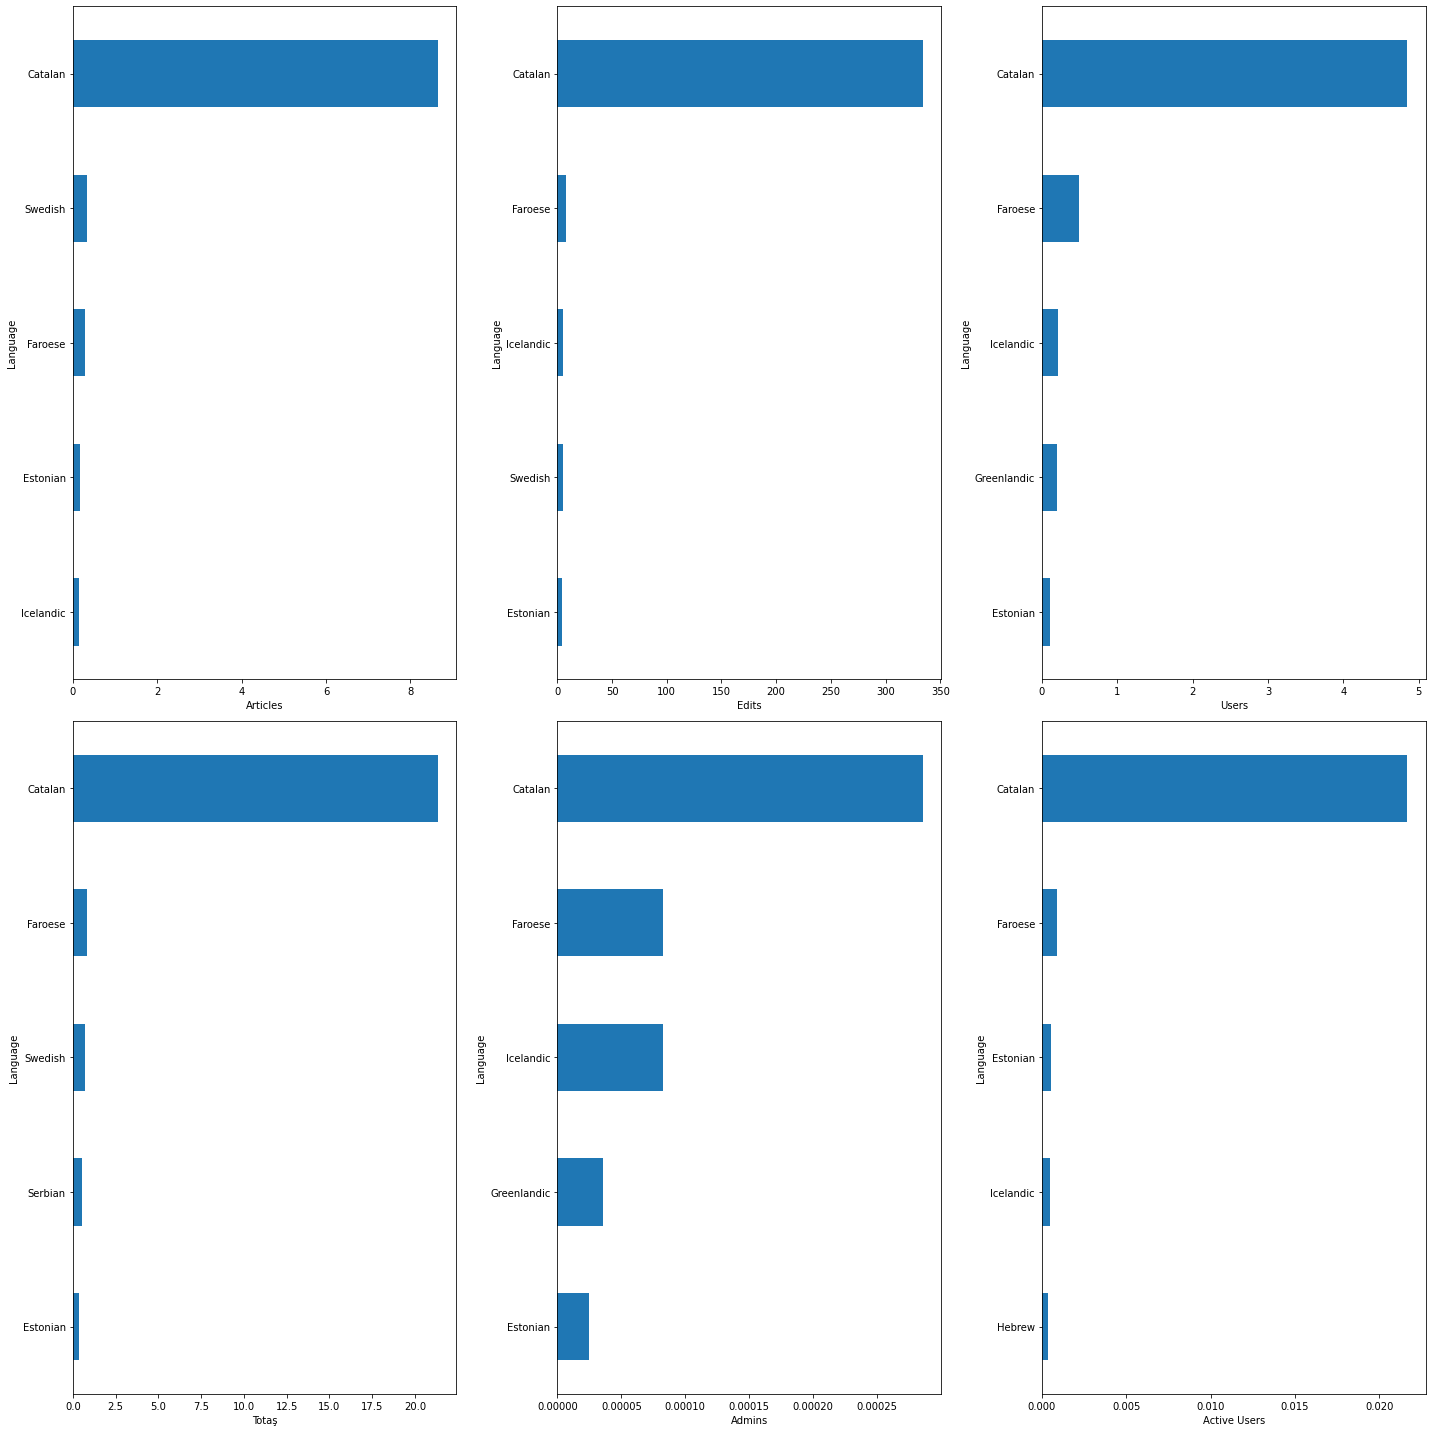

In [43]:
#visualize groups by languages
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 20))
df_wiki_ratio['ratio_Articles'].sort_values().tail(5).plot.barh(ax=axs[0,0])
axs[0,0].set_xlabel('Articles')
df_wiki_ratio['ratio_Total'].sort_values().tail(5).plot.barh(ax=axs[1,0])
axs[1,0].set_xlabel('Totaş')
df_wiki_ratio['ratio_Edits'].sort_values().tail(5).plot.barh(ax=axs[0,1])
axs[0,1].set_xlabel('Edits')
df_wiki_ratio['ratio_Admins'].sort_values().tail(5).plot.barh(ax=axs[1,1])
axs[1,1].set_xlabel('Admins')
df_wiki_ratio['ratio_Users'].sort_values().tail(5).plot.barh(ax=axs[0,2])
axs[0,2].set_xlabel('Users')
df_wiki_ratio['ratio_Active_Users'].sort_values().tail(5).plot.barh(ax=axs[1,2])
axs[1,2].set_xlabel('Active Users')
plt.tight_layout()

<AxesSubplot:>

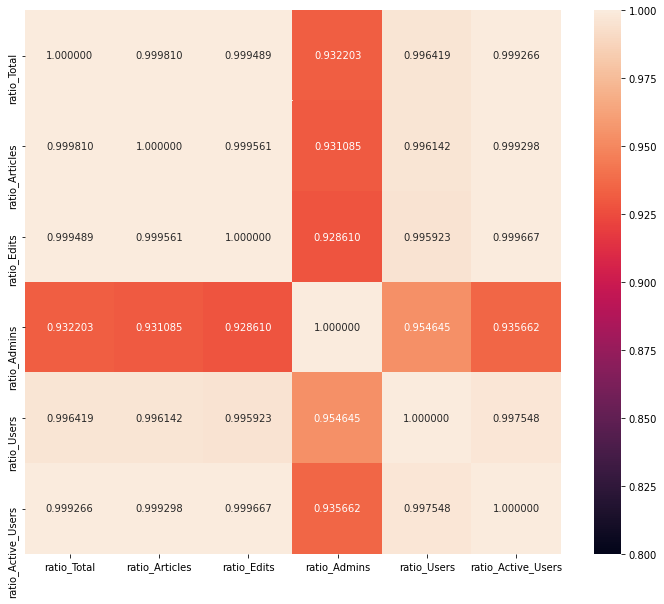

In [44]:
#visualize correlatio for languages
plt.figure(figsize=(12,10))
sns.heatmap(df_wiki_ratio.corr(), annot=True, vmin=0.80000, vmax=1.00000,fmt='f')

In [45]:
#eliminating small countries
wiki_bigger = wiki[wiki['population']>1000000]
wiki_bigger


,name,continent,Language,Language (local),Wiki,Articles,Total,Edits,Admins,Users,Active Users,Files,Depth,Country Name,Year,population
1,United Arab Emirates,AS,Arabic,العربية,ar,1095998,7061800,51974183,26,1974729,6173.0,38192,218,United Arab Emirates,2018,9630959
2,Bahrain,AS,Arabic,العربية,ar,1095998,7061800,51974183,26,1974729,6173.0,38192,218,Bahrain,2018,1569439
3,Algeria,AF,Arabic,العربية,ar,1095998,7061800,51974183,26,1974729,6173.0,38192,218,Algeria,2018,42228429
4,Iraq,AS,Arabic,العربية,ar,1095998,7061800,51974183,26,1974729,6173.0,38192,218,Iraq,2018,38433600
5,Jordan,AS,Arabic,العربية,ar,1095998,7061800,51974183,26,1974729,6173.0,38192,218,Jordan,2018,9956011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,Tanzania,AF,Swahili,Kiswahili,sw,60286,125046,1133666,14,45338,117.0,2252,10,Tanzania,2018,56318348
177,Ukraine,EU,Ukrainian,Українська,uk,1063037,3650562,30310345,47,536956,3620.0,112369,49,Ukraine,2018,44622516
178,Uzbekistan,AS,Uzbek,O‘zbek,uz,139189,632318,2155577,11,58200,359.0,1556,43,Uzbekistan,2018,32955400
179,Vietnam,AS,Vietnamese,Tiếng Việt,vi,1259938,19218526,64118564,20,779402,2097.0,22452,--,Vietnam,2018,95540395


In [46]:
#groupping by language 
df_wiki_bigger = wiki_bigger.groupby('Language').mean()[['Articles','Total','Edits','Admins','Users','Active Users']]
df_wiki_bigger

,Articles,Total,Edits,Admins,Users,Active Users
Language,,,,,,
Afrikaans,95351.0,346908.0,2349566.0,18.0,130452.0,193.0
Albanian,81860.0,243347.0,2164347.0,13.0,128312.0,318.0
Amharic,14905.0,45652.0,361612.0,3.0,33474.0,42.0
Arabic,1095998.0,7061800.0,51974183.0,26.0,1974729.0,6173.0
Armenian,279273.0,943833.0,7568883.0,11.0,105107.0,663.0
Azerbaijani,175808.0,459150.0,5652386.0,16.0,212203.0,1185.0
Belarusian,199642.0,600030.0,3752646.0,10.0,101968.0,282.0
Bengali,99901.0,881153.0,4763723.0,12.0,312080.0,1077.0
Bosnian,84701.0,351600.0,3229506.0,10.0,129177.0,185.0


In [47]:
#adding population as sum to dataframe 
df_wiki_bigger['pop_total']=wiki_bigger.groupby('Language').sum()[['population']]
df_wiki_bigger

,Articles,Total,Edits,Admins,Users,Active Users,pop_total
Language,,,,,,,
Afrikaans,95351.0,346908.0,2349566.0,18.0,130452.0,193.0,57779622
Albanian,81860.0,243347.0,2164347.0,13.0,128312.0,318.0,4711676
Amharic,14905.0,45652.0,361612.0,3.0,33474.0,42.0,109224559
Arabic,1095998.0,7061800.0,51974183.0,26.0,1974729.0,6173.0,254593540
Armenian,279273.0,943833.0,7568883.0,11.0,105107.0,663.0,2951776
Azerbaijani,175808.0,459150.0,5652386.0,16.0,212203.0,1185.0,9939800
Belarusian,199642.0,600030.0,3752646.0,10.0,101968.0,282.0,9483499
Bengali,99901.0,881153.0,4763723.0,12.0,312080.0,1077.0,161356039
Bosnian,84701.0,351600.0,3229506.0,10.0,129177.0,185.0,3323929


In [48]:
#finding ratio of each colums to population total
df_wiki_bigger['ratio_Total']= df_wiki_bigger['Total']/df_wiki_bigger['pop_total']
df_wiki_bigger['ratio_Articles']= df_wiki_bigger['Articles']/df_wiki_bigger['pop_total']
df_wiki_bigger['ratio_Edits']= df_wiki_bigger['Edits']/df_wiki_bigger['pop_total']
df_wiki_bigger['ratio_Admins']= df_wiki_bigger['Admins']/df_wiki_bigger['pop_total']
df_wiki_bigger['ratio_Users']= df_wiki_bigger['Users']/df_wiki_bigger['pop_total']
df_wiki_bigger['ratio_Active_Users']= df_wiki_bigger['Active Users']/df_wiki_bigger['pop_total']
df_wiki_bigger

,Articles,Total,Edits,Admins,Users,Active Users,pop_total,ratio_Total,ratio_Articles,ratio_Edits,ratio_Admins,ratio_Users,ratio_Active_Users
Language,,,,,,,,,,,,,
Afrikaans,95351.0,346908.0,2349566.0,18.0,130452.0,193.0,57779622,0.006004,0.001650,0.040664,3.115285e-07,0.002258,3.340278e-06
Albanian,81860.0,243347.0,2164347.0,13.0,128312.0,318.0,4711676,0.051648,0.017374,0.459358,2.759103e-06,0.027233,6.749191e-05
Amharic,14905.0,45652.0,361612.0,3.0,33474.0,42.0,109224559,0.000418,0.000136,0.003311,2.746635e-08,0.000306,3.845289e-07
Arabic,1095998.0,7061800.0,51974183.0,26.0,1974729.0,6173.0,254593540,0.027738,0.004305,0.204146,1.021236e-07,0.007756,2.424649e-05
Armenian,279273.0,943833.0,7568883.0,11.0,105107.0,663.0,2951776,0.319751,0.094612,2.564179,3.726570e-06,0.035608,2.246105e-04
Azerbaijani,175808.0,459150.0,5652386.0,16.0,212203.0,1185.0,9939800,0.046193,0.017687,0.568662,1.609690e-06,0.021349,1.192177e-04
Belarusian,199642.0,600030.0,3752646.0,10.0,101968.0,282.0,9483499,0.063271,0.021052,0.395703,1.054463e-06,0.010752,2.973586e-05
Bengali,99901.0,881153.0,4763723.0,12.0,312080.0,1077.0,161356039,0.005461,0.000619,0.029523,7.436970e-08,0.001934,6.674680e-06
Bosnian,84701.0,351600.0,3229506.0,10.0,129177.0,185.0,3323929,0.105778,0.025482,0.971593,3.008488e-06,0.038863,5.565703e-05


In [49]:
#sorting values according to the number of Articles
df_wiki_bigger.sort_values('Articles', ascending=False)

,Articles,Total,Edits,Admins,Users,Active Users,pop_total,ratio_Total,ratio_Articles,ratio_Edits,ratio_Admins,ratio_Users,ratio_Active_Users
Language,,,,,,,,,,,,,
English,6213459.0,52192556.0,991192059.0,1119.0,40573504.0,131217.0,1223895211,0.042645,0.005077,0.809867,9.142940e-07,0.033151,1.072126e-04
Swedish,3494069.0,7534140.0,48508312.0,61.0,755016.0,2601.0,10175214,0.740440,0.343390,4.767301,5.994960e-06,0.074201,2.556212e-04
German,2514073.0,7004424.0,205407498.0,190.0,3601669.0,19091.0,100259530,0.069863,0.025076,2.048758,1.895082e-06,0.035923,1.904158e-04
French,2280928.0,11084097.0,177490158.0,159.0,3964719.0,20909.0,246716425,0.044926,0.009245,0.719410,6.444646e-07,0.016070,8.474912e-05
Dutch,2043754.0,4289734.0,57653624.0,36.0,1111079.0,4107.0,28664880,0.149651,0.071298,2.011298,1.255892e-06,0.038761,1.432764e-04
Italian,1660763.0,6886936.0,117156488.0,113.0,2058438.0,9154.0,60421760,0.113981,0.027486,1.938978,1.870187e-06,0.034068,1.515017e-04
Spanish,1648495.0,7275181.0,131447598.0,67.0,6068100.0,16849.0,432059130,0.016838,0.003815,0.304235,1.550714e-07,0.014045,3.899698e-05
Polish,1446350.0,3324560.0,61543078.0,102.0,1072637.0,4668.0,37974750,0.087547,0.038087,1.620632,2.685995e-06,0.028246,1.229238e-04
Vietnamese,1259938.0,19218526.0,64118564.0,20.0,779402.0,2097.0,95540395,0.201156,0.013187,0.671115,2.093355e-07,0.008158,2.194883e-05


In [50]:
#getting ratio columns
df_ratio_bigger = df_wiki_bigger[['ratio_Total','ratio_Articles','ratio_Edits','ratio_Admins','ratio_Users','ratio_Active_Users']]
df_ratio_bigger

,ratio_Total,ratio_Articles,ratio_Edits,ratio_Admins,ratio_Users,ratio_Active_Users
Language,,,,,,
Afrikaans,0.006004,0.001650,0.040664,3.115285e-07,0.002258,3.340278e-06
Albanian,0.051648,0.017374,0.459358,2.759103e-06,0.027233,6.749191e-05
Amharic,0.000418,0.000136,0.003311,2.746635e-08,0.000306,3.845289e-07
Arabic,0.027738,0.004305,0.204146,1.021236e-07,0.007756,2.424649e-05
Armenian,0.319751,0.094612,2.564179,3.726570e-06,0.035608,2.246105e-04
Azerbaijani,0.046193,0.017687,0.568662,1.609690e-06,0.021349,1.192177e-04
Belarusian,0.063271,0.021052,0.395703,1.054463e-06,0.010752,2.973586e-05
Bengali,0.005461,0.000619,0.029523,7.436970e-08,0.001934,6.674680e-06
Bosnian,0.105778,0.025482,0.971593,3.008488e-06,0.038863,5.565703e-05


In [51]:
#sorting values according to the number of ratio of Articles to Population
df_ratio_bigger.sort_values('ratio_Articles', ascending=False)

,ratio_Total,ratio_Articles,ratio_Edits,ratio_Admins,ratio_Users,ratio_Active_Users
Language,,,,,,
Swedish,0.740440,0.343390,4.767301,5.994960e-06,0.074201,2.556212e-04
Estonian,0.386829,0.162084,4.366220,2.496261e-05,0.110872,5.181633e-04
Norwegian (Bokmål),0.281752,0.102954,3.947578,6.965472e-06,0.096049,2.488744e-04
Armenian,0.319751,0.094612,2.564179,3.726570e-06,0.035608,2.246105e-04
Serbian,0.563675,0.091846,3.361344,2.864261e-06,0.039542,1.400624e-04
Finnish,0.240280,0.090546,3.513759,5.983111e-06,0.084639,3.082209e-04
Slovenian,0.198785,0.082261,2.605161,1.012588e-05,0.094523,2.150544e-04
Lithuanian,0.171313,0.071685,2.150594,4.640300e-06,0.053120,1.688355e-04
Dutch,0.149651,0.071298,2.011298,1.255892e-06,0.038761,1.432764e-04


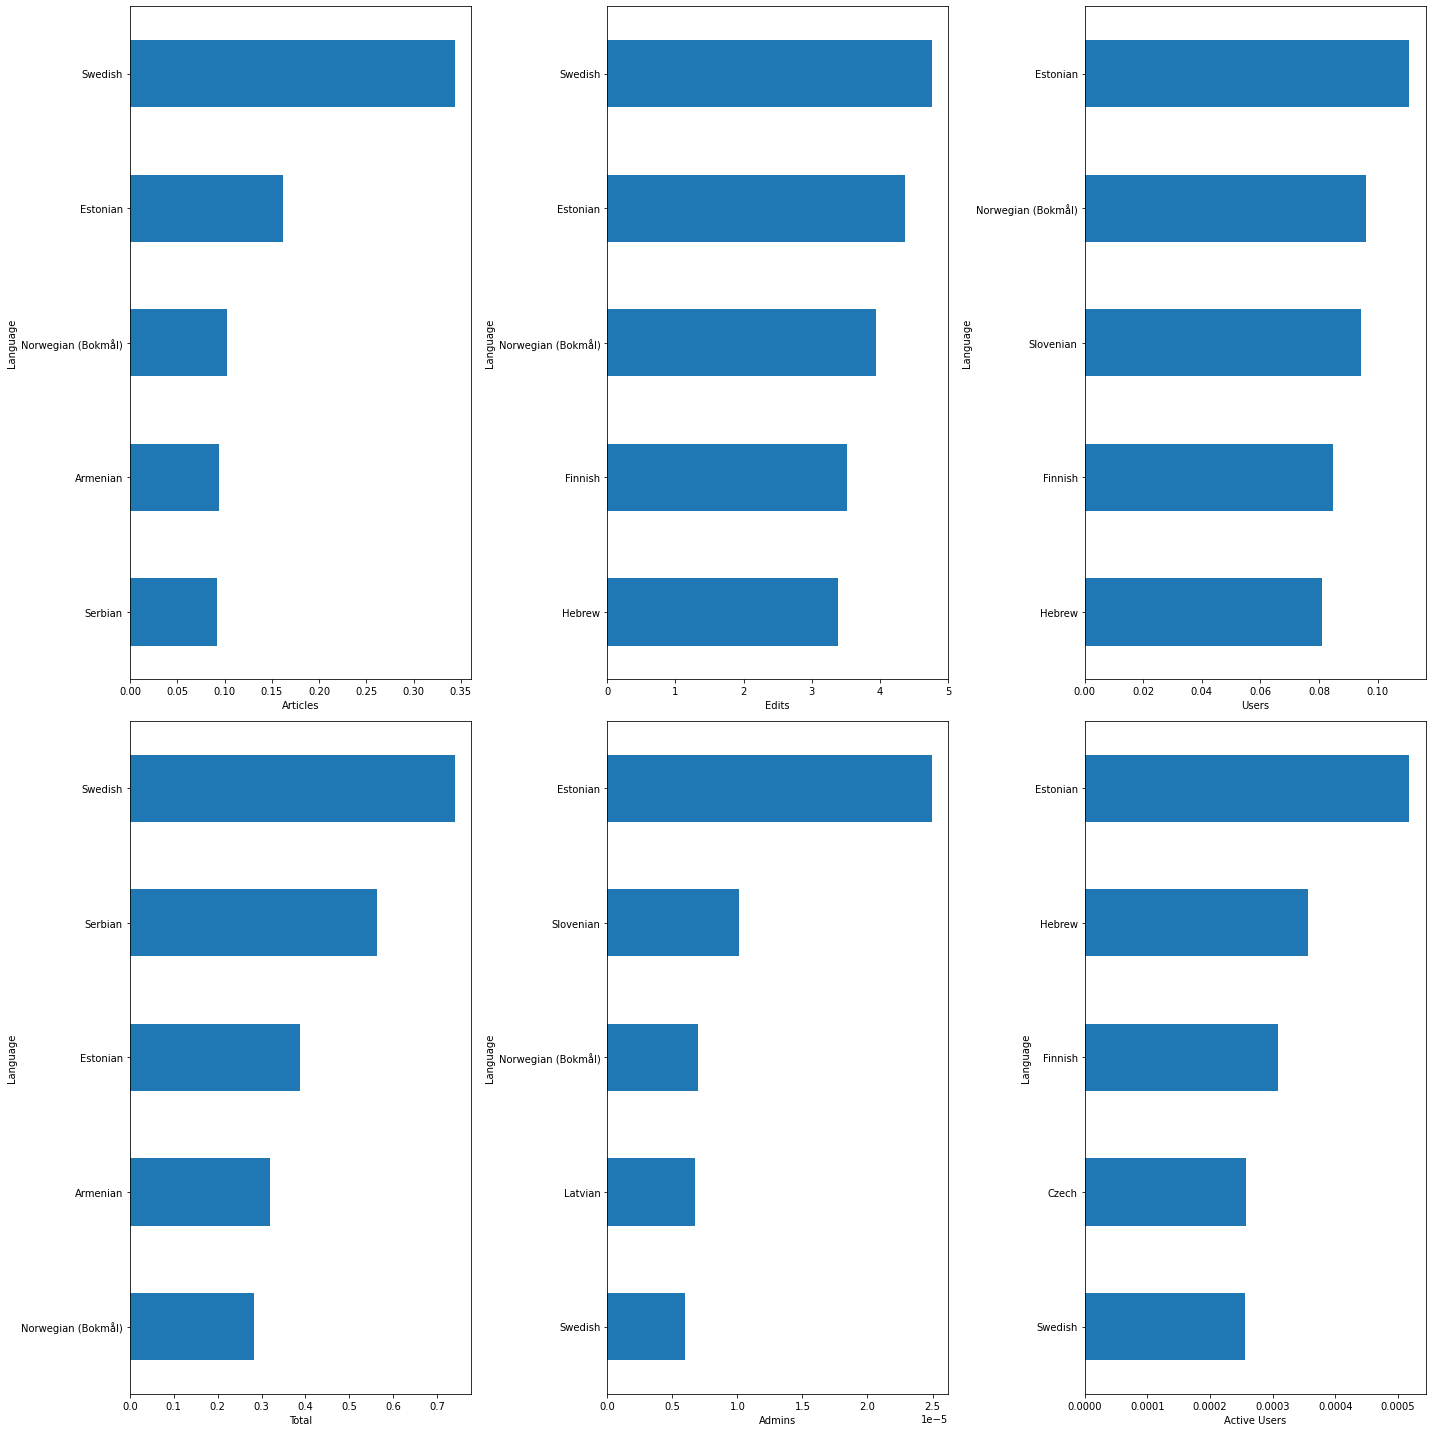

In [52]:
#visualize groups by languages
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 20))
df_ratio_bigger['ratio_Articles'].sort_values().tail(5).plot.barh(ax=axs[0,0])
axs[0,0].set_xlabel('Articles')
df_ratio_bigger['ratio_Total'].sort_values().tail(5).plot.barh(ax=axs[1,0])
axs[1,0].set_xlabel('Total')
df_ratio_bigger['ratio_Edits'].sort_values().tail(5).plot.barh(ax=axs[0,1])
axs[0,1].set_xlabel('Edits')
df_ratio_bigger['ratio_Admins'].sort_values().tail(5).plot.barh(ax=axs[1,1])
axs[1,1].set_xlabel('Admins')
df_ratio_bigger['ratio_Users'].sort_values().tail(5).plot.barh(ax=axs[0,2])
axs[0,2].set_xlabel('Users')
df_ratio_bigger['ratio_Active_Users'].sort_values().tail(5).plot.barh(ax=axs[1,2])
axs[1,2].set_xlabel('Active Users')
plt.tight_layout()

<AxesSubplot:>

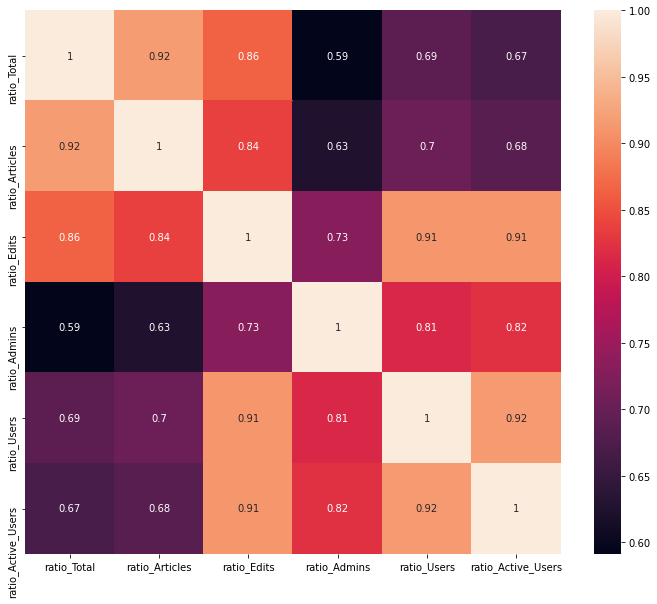

In [53]:
#visualize correlation for countries having more than one million population
plt.figure(figsize=(12,10))
sns.heatmap(df_ratio_bigger.corr(), annot=True)

In [54]:
#to download gpd per capita data from wikipedia
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita'
tables = pd.read_html(url)
gdp_per = tables[3]
gdp_per

,Rank,Country/Territory,US$
0,1,Monaco,190532
1,2,Liechtenstein,179258
2,3,Luxembourg,115481
3,—,Bermuda,117768
4,—,Cayman Islands,92692
...,...,...,...
212,189,Central African Republic,468
213,190,South Sudan,448
214,191,Malawi,435
215,192,Burundi,260


In [55]:
gdp_per.rename(columns={'US$':'gdp_per'}, inplace=True)

In [56]:
#to assign a gdp per capita of country for each wiki language
wiki=pd.merge(wiki, gdp_per, right_on='Country/Territory', left_on='name')
wiki

,name,continent,Language,Language (local),Wiki,Articles,Total,Edits,Admins,Users,Active Users,Files,Depth,Country Name,Year,population,Rank,Country/Territory,gdp_per
0,Andorra,EU,Catalan,Català,ca,666582,1645144,25719296,22,373341,1669.0,13635,34,Andorra,2018,77006,25,Andorra,40887
1,United Arab Emirates,AS,Arabic,العربية,ar,1095998,7061800,51974183,26,1974729,6173.0,38192,218,United Arab Emirates,2018,9630959,23,United Arab Emirates,43103
2,Bahrain,AS,Arabic,العربية,ar,1095998,7061800,51974183,26,1974729,6173.0,38192,218,Bahrain,2018,1569439,38,Bahrain,23504
3,Algeria,AF,Arabic,العربية,ar,1095998,7061800,51974183,26,1974729,6173.0,38192,218,Algeria,2018,42228429,119,Algeria,3976
4,Iraq,AS,Arabic,العربية,ar,1095998,7061800,51974183,26,1974729,6173.0,38192,218,Iraq,2018,38433600,98,Iraq,5730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,Uzbekistan,AS,Uzbek,O‘zbek,uz,139189,632318,2155577,11,58200,359.0,1556,43,Uzbekistan,2018,32955400,148,Uzbekistan,1756
171,Vietnam,AS,Vietnamese,Tiếng Việt,vi,1259938,19218526,64118564,20,779402,2097.0,22452,--,Vietnam,2018,95540395,134,Vietnam,2715
172,Vanuatu,OC,Bislama,Bislama,bi,1243,2989,38459,1,10330,16.0,0,25,Vanuatu,2018,292680,131,Vanuatu,3023
173,Samoa,OC,Samoan,Gagana Samoa,sm,975,3063,41019,1,8483,12.0,0,61,Samoa,2018,196130,113,Samoa,4285


In [57]:
#groupping by language
df_wiki = wiki.groupby('Language').mean()[['Articles','Total','Edits','Admins','Users','Active Users','gdp_per']]
df_wiki

,Articles,Total,Edits,Admins,Users,Active Users,gdp_per
Language,,,,,,,
Afrikaans,95351.0,346908.0,2349566.0,18.0,130452.0,193.0,6001.0000
Albanian,81860.0,243347.0,2164347.0,13.0,128312.0,318.0,4888.0000
Amharic,14905.0,45652.0,361612.0,3.0,33474.0,42.0,828.0000
Arabic,1095998.0,7061800.0,51974183.0,26.0,1974729.0,6173.0,14939.9375
Armenian,279273.0,943833.0,7568883.0,11.0,105107.0,663.0,4623.0000
...,...,...,...,...,...,...,...
Turkish,384794.0,1923748.0,24409646.0,26.0,1250509.0,3497.0,9127.0000
Turkmen,5852.0,14010.0,214633.0,1.0,20705.0,45.0,8124.0000
Ukrainian,1063037.0,3650562.0,30310345.0,47.0,536956.0,3620.0,3496.0000


In [58]:
#finding ratio of each colums to gdp per capita
df_wiki['ratio_Total']= df_wiki['Total']/df_wiki['gdp_per']
df_wiki['ratio_Articles']= df_wiki['Articles']/df_wiki['gdp_per']
df_wiki['ratio_Edits']= df_wiki['Edits']/df_wiki['gdp_per']
df_wiki['ratio_Admins']= df_wiki['Admins']/df_wiki['gdp_per']
df_wiki['ratio_Users']= df_wiki['Users']/df_wiki['gdp_per']
df_wiki['ratio_Active_Users']= df_wiki['Active Users']/df_wiki['gdp_per']

In [59]:
df_wiki

,Articles,Total,Edits,Admins,Users,Active Users,gdp_per,ratio_Total,ratio_Articles,ratio_Edits,ratio_Admins,ratio_Users,ratio_Active_Users
Language,,,,,,,,,,,,,
Afrikaans,95351.0,346908.0,2349566.0,18.0,130452.0,193.0,6001.0000,57.808365,15.889185,391.529078,0.003000,21.738377,0.032161
Albanian,81860.0,243347.0,2164347.0,13.0,128312.0,318.0,4888.0000,49.784574,16.747136,442.787848,0.002660,26.250409,0.065057
Amharic,14905.0,45652.0,361612.0,3.0,33474.0,42.0,828.0000,55.135266,18.001208,436.729469,0.003623,40.427536,0.050725
Arabic,1095998.0,7061800.0,51974183.0,26.0,1974729.0,6173.0,14939.9375,472.679354,73.360280,3478.875531,0.001740,132.177862,0.413188
Armenian,279273.0,943833.0,7568883.0,11.0,105107.0,663.0,4623.0000,204.160286,60.409474,1637.223232,0.002379,22.735669,0.143413
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Turkish,384794.0,1923748.0,24409646.0,26.0,1250509.0,3497.0,9127.0000,210.775501,42.159965,2674.443519,0.002849,137.012052,0.383149
Turkmen,5852.0,14010.0,214633.0,1.0,20705.0,45.0,8124.0000,1.724520,0.720335,26.419621,0.000123,2.548621,0.005539
Ukrainian,1063037.0,3650562.0,30310345.0,47.0,536956.0,3620.0,3496.0000,1044.211098,304.072368,8670.007151,0.013444,153.591533,1.035469


In [60]:
#getting ratio columns
df_wiki_ratio = df_wiki[['ratio_Total','ratio_Articles','ratio_Edits','ratio_Admins','ratio_Users','ratio_Active_Users']]
df_wiki_ratio

,ratio_Total,ratio_Articles,ratio_Edits,ratio_Admins,ratio_Users,ratio_Active_Users
Language,,,,,,
Afrikaans,57.808365,15.889185,391.529078,0.003000,21.738377,0.032161
Albanian,49.784574,16.747136,442.787848,0.002660,26.250409,0.065057
Amharic,55.135266,18.001208,436.729469,0.003623,40.427536,0.050725
Arabic,472.679354,73.360280,3478.875531,0.001740,132.177862,0.413188
Armenian,204.160286,60.409474,1637.223232,0.002379,22.735669,0.143413
...,...,...,...,...,...,...
Turkish,210.775501,42.159965,2674.443519,0.002849,137.012052,0.383149
Turkmen,1.724520,0.720335,26.419621,0.000123,2.548621,0.005539
Ukrainian,1044.211098,304.072368,8670.007151,0.013444,153.591533,1.035469


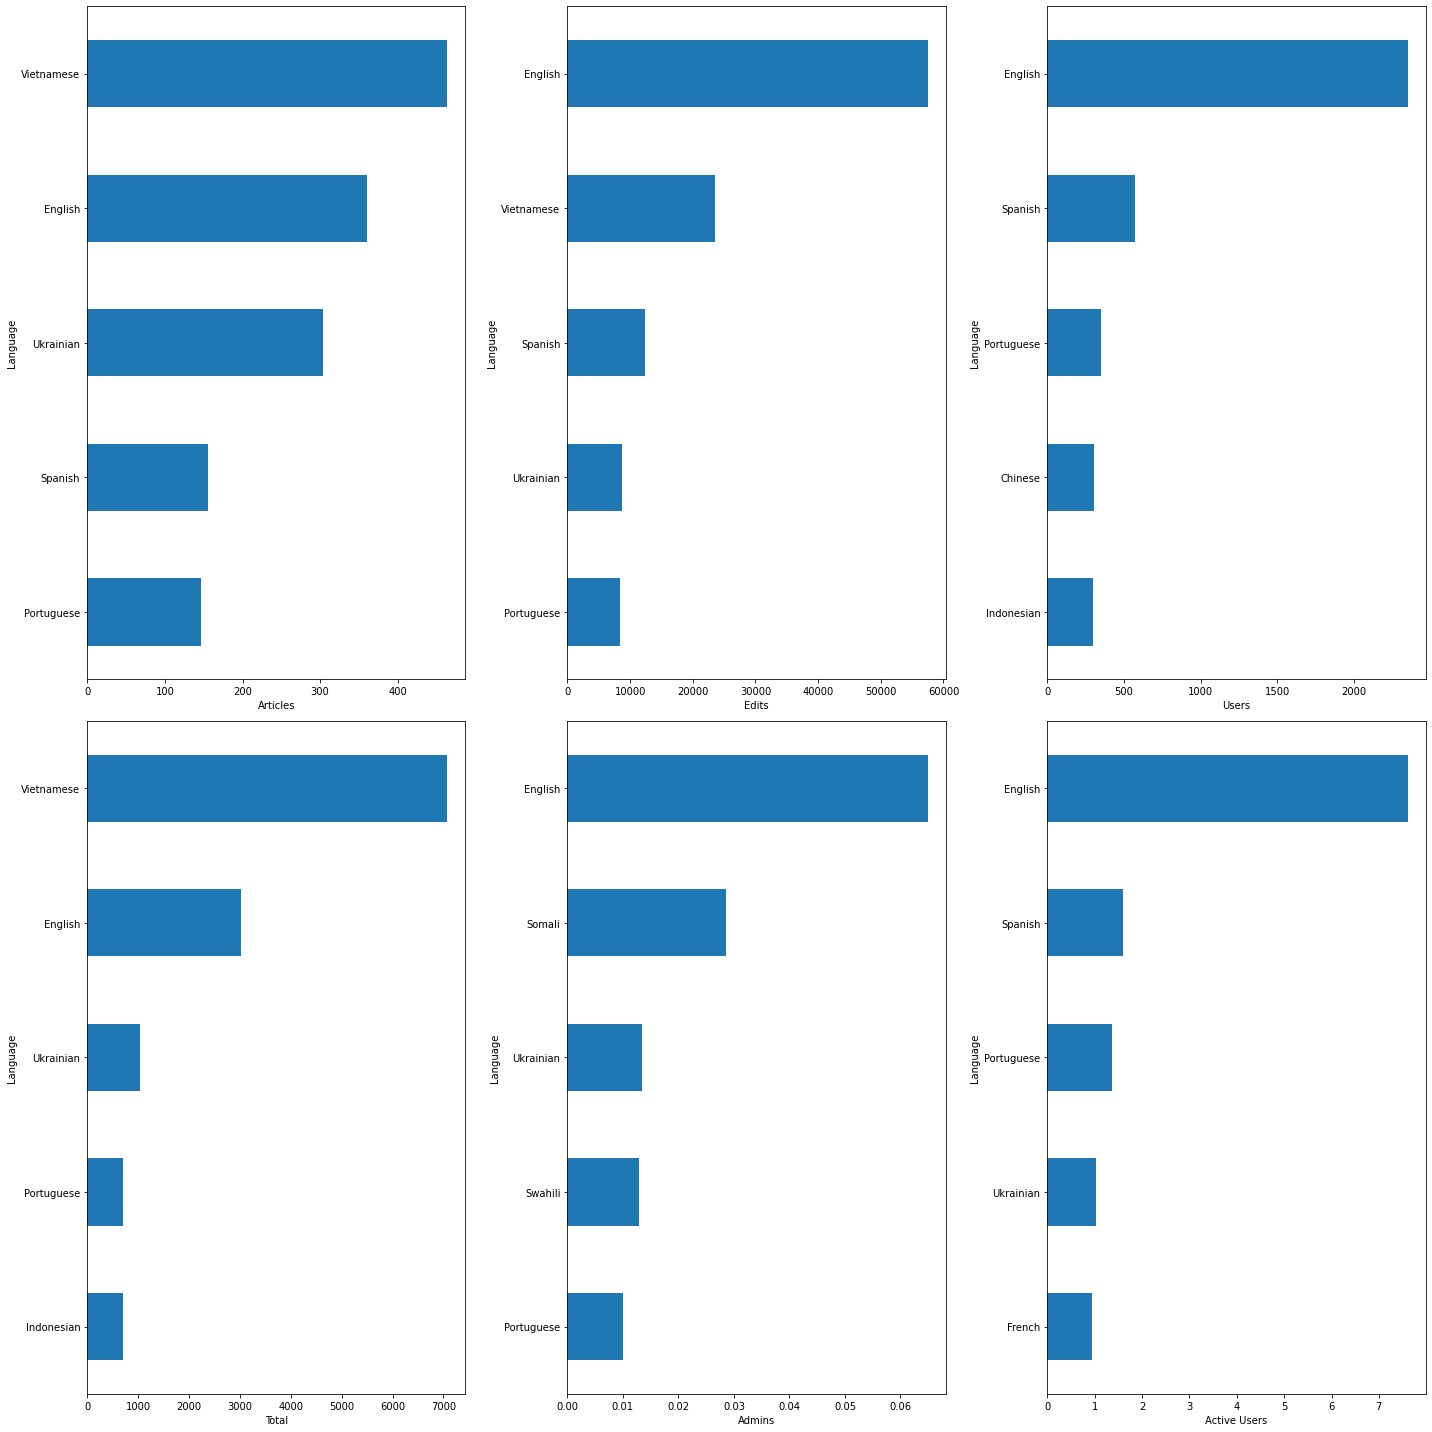

In [61]:
#visualize groups by languages
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 20))
df_wiki_ratio['ratio_Articles'].sort_values().tail(5).plot.barh(ax=axs[0,0])
axs[0,0].set_xlabel('Articles')
df_wiki_ratio['ratio_Total'].sort_values().tail(5).plot.barh(ax=axs[1,0])
axs[1,0].set_xlabel('Total')
df_wiki_ratio['ratio_Edits'].sort_values().tail(5).plot.barh(ax=axs[0,1])
axs[0,1].set_xlabel('Edits')
df_wiki_ratio['ratio_Admins'].sort_values().tail(5).plot.barh(ax=axs[1,1])
axs[1,1].set_xlabel('Admins')
df_wiki_ratio['ratio_Users'].sort_values().tail(5).plot.barh(ax=axs[0,2])
axs[0,2].set_xlabel('Users')
df_wiki_ratio['ratio_Active_Users'].sort_values().tail(5).plot.barh(ax=axs[1,2])
axs[1,2].set_xlabel('Active Users')
plt.tight_layout()

<AxesSubplot:>

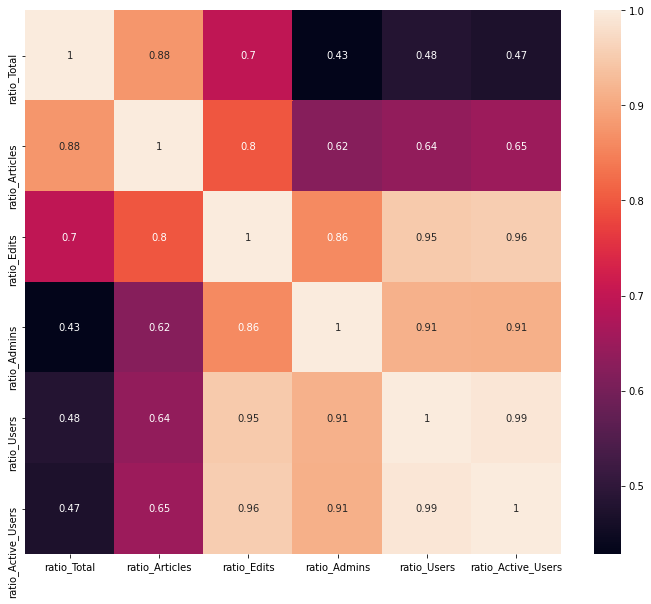

In [62]:
#visualize correlatio for all languages
plt.figure(figsize=(12,10))
sns.heatmap(df_wiki_ratio.corr(), annot=True)

In [63]:
#eliminating #eliminating low income and lower middle income countries countries
wiki_bigger = wiki[wiki['gdp_per']>4000]
wiki_bigger

,name,continent,Language,Language (local),Wiki,Articles,Total,Edits,Admins,Users,Active Users,Files,Depth,Country Name,Year,population,Rank,Country/Territory,gdp_per
0,Andorra,EU,Catalan,Català,ca,666582,1645144,25719296,22,373341,1669.0,13635,34,Andorra,2018,77006,25,Andorra,40887
1,United Arab Emirates,AS,Arabic,العربية,ar,1095998,7061800,51974183,26,1974729,6173.0,38192,218,United Arab Emirates,2018,9630959,23,United Arab Emirates,43103
2,Bahrain,AS,Arabic,العربية,ar,1095998,7061800,51974183,26,1974729,6173.0,38192,218,Bahrain,2018,1569439,38,Bahrain,23504
4,Iraq,AS,Arabic,العربية,ar,1095998,7061800,51974183,26,1974729,6173.0,38192,218,Iraq,2018,38433600,98,Iraq,5730
5,Jordan,AS,Arabic,العربية,ar,1095998,7061800,51974183,26,1974729,6173.0,38192,218,Jordan,2018,9956011,110,Jordan,4405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,Thailand,AS,Thai,ไทย,th,141032,871539,9163254,16,394243,1007.0,29479,282,Thailand,2018,69428524,82,Thailand,7785
166,Turkmenistan,AS,Turkmen,Türkmen,tk,5852,14010,214633,1,20705,45.0,319,30,Turkmenistan,2018,5850908,79,Turkmenistan,8124
167,Turkey,AS,Turkish,Türkçe,tr,384794,1923748,24409646,26,1250509,3497.0,35589,203,Turkey,2018,82319724,74,Turkey,9127
173,Samoa,OC,Samoan,Gagana Samoa,sm,975,3063,41019,1,8483,12.0,0,61,Samoa,2018,196130,113,Samoa,4285


In [64]:
#groupping by language 
df_wiki_bigger = wiki_bigger.groupby('Language').mean()[['Articles','Total','Edits','Admins','Users','Active Users', 'gdp_per']]
df_wiki_bigger

,Articles,Total,Edits,Admins,Users,Active Users,gdp_per
Language,,,,,,,
Afrikaans,95351.0,346908.0,2349566.0,18.0,130452.0,193.0,6001.000000
Albanian,81860.0,243347.0,2164347.0,13.0,128312.0,318.0,4888.000000
Arabic,1095998.0,7061800.0,51974183.0,26.0,1974729.0,6173.0,22460.000000
Armenian,279273.0,943833.0,7568883.0,11.0,105107.0,663.0,4623.000000
Azerbaijani,175808.0,459150.0,5652386.0,16.0,212203.0,1185.0,4782.000000
Belarusian,199642.0,600030.0,3752646.0,10.0,101968.0,282.0,6674.000000
Bosnian,84701.0,351600.0,3229506.0,10.0,129177.0,185.0,6109.000000
Bulgarian,267919.0,595811.0,10572609.0,27.0,280789.0,810.0,9703.000000
Catalan,666582.0,1645144.0,25719296.0,22.0,373341.0,1669.0,40887.000000


In [65]:
#finding ratio of each colums to gdp per capita
df_wiki_bigger['ratio_Total']= df_wiki_bigger['Total']/df_wiki_bigger['gdp_per']
df_wiki_bigger['ratio_Articles']= df_wiki_bigger['Articles']/df_wiki_bigger['gdp_per']
df_wiki_bigger['ratio_Edits']= df_wiki_bigger['Edits']/df_wiki_bigger['gdp_per']
df_wiki_bigger['ratio_Admins']= df_wiki_bigger['Admins']/df_wiki_bigger['gdp_per']
df_wiki_bigger['ratio_Users']= df_wiki_bigger['Users']/df_wiki_bigger['gdp_per']
df_wiki_bigger['ratio_Active_Users']= df_wiki_bigger['Active Users']/df_wiki_bigger['gdp_per']
df_wiki_bigger

,Articles,Total,Edits,Admins,Users,Active Users,gdp_per,ratio_Total,ratio_Articles,ratio_Edits,ratio_Admins,ratio_Users,ratio_Active_Users
Language,,,,,,,,,,,,,
Afrikaans,95351.0,346908.0,2349566.0,18.0,130452.0,193.0,6001.000000,57.808365,15.889185,391.529078,0.003000,21.738377,0.032161
Albanian,81860.0,243347.0,2164347.0,13.0,128312.0,318.0,4888.000000,49.784574,16.747136,442.787848,0.002660,26.250409,0.065057
Arabic,1095998.0,7061800.0,51974183.0,26.0,1974729.0,6173.0,22460.000000,314.416741,48.797774,2314.077605,0.001158,87.922039,0.274844
Armenian,279273.0,943833.0,7568883.0,11.0,105107.0,663.0,4623.000000,204.160286,60.409474,1637.223232,0.002379,22.735669,0.143413
Azerbaijani,175808.0,459150.0,5652386.0,16.0,212203.0,1185.0,4782.000000,96.016311,36.764534,1182.012965,0.003346,44.375366,0.247804
Belarusian,199642.0,600030.0,3752646.0,10.0,101968.0,282.0,6674.000000,89.905604,29.913395,562.278394,0.001498,15.278394,0.042254
Bosnian,84701.0,351600.0,3229506.0,10.0,129177.0,185.0,6109.000000,57.554428,13.864953,528.647242,0.001637,21.145359,0.030283
Bulgarian,267919.0,595811.0,10572609.0,27.0,280789.0,810.0,9703.000000,61.404823,27.611976,1089.622694,0.002783,28.938370,0.083479
Catalan,666582.0,1645144.0,25719296.0,22.0,373341.0,1669.0,40887.000000,40.236359,16.303030,629.033580,0.000538,9.131044,0.040820


In [66]:
#getting ratio columns
df_ratio_bigger = df_wiki_bigger[['ratio_Total','ratio_Articles','ratio_Edits','ratio_Admins','ratio_Users','ratio_Active_Users']]
df_ratio_bigger

,ratio_Total,ratio_Articles,ratio_Edits,ratio_Admins,ratio_Users,ratio_Active_Users
Language,,,,,,
Afrikaans,57.808365,15.889185,391.529078,0.003000,21.738377,0.032161
Albanian,49.784574,16.747136,442.787848,0.002660,26.250409,0.065057
Arabic,314.416741,48.797774,2314.077605,0.001158,87.922039,0.274844
Armenian,204.160286,60.409474,1637.223232,0.002379,22.735669,0.143413
Azerbaijani,96.016311,36.764534,1182.012965,0.003346,44.375366,0.247804
Belarusian,89.905604,29.913395,562.278394,0.001498,15.278394,0.042254
Bosnian,57.554428,13.864953,528.647242,0.001637,21.145359,0.030283
Bulgarian,61.404823,27.611976,1089.622694,0.002783,28.938370,0.083479
Catalan,40.236359,16.303030,629.033580,0.000538,9.131044,0.040820


In [67]:
#sorting values according to the number of ratio of Articles to gdp per capita
df_ratio_bigger.sort_values('ratio_Articles', ascending=False)

,ratio_Total,ratio_Articles,ratio_Edits,ratio_Admins,ratio_Users,ratio_Active_Users
Language,,,,,,
English,1894.448129,225.531698,35977.581587,0.040617,1472.708076,4.762821
Spanish,606.839201,137.504674,10964.339625,0.005589,506.153861,1.405413
Indonesian,694.301257,134.055368,4284.029981,0.008221,294.675290,0.703095
Chinese,643.599860,116.524390,6305.385046,0.007897,302.893842,0.796281
Polish,211.391874,91.966046,3913.211547,0.006486,68.203535,0.296814
Serbian,486.396688,79.254202,2900.511246,0.002472,34.120860,0.120860
Swedish,142.433076,66.055448,917.050665,0.001153,14.273593,0.049172
Portuguese,318.446909,65.397415,3731.187728,0.004485,156.282261,0.606323
Armenian,204.160286,60.409474,1637.223232,0.002379,22.735669,0.143413


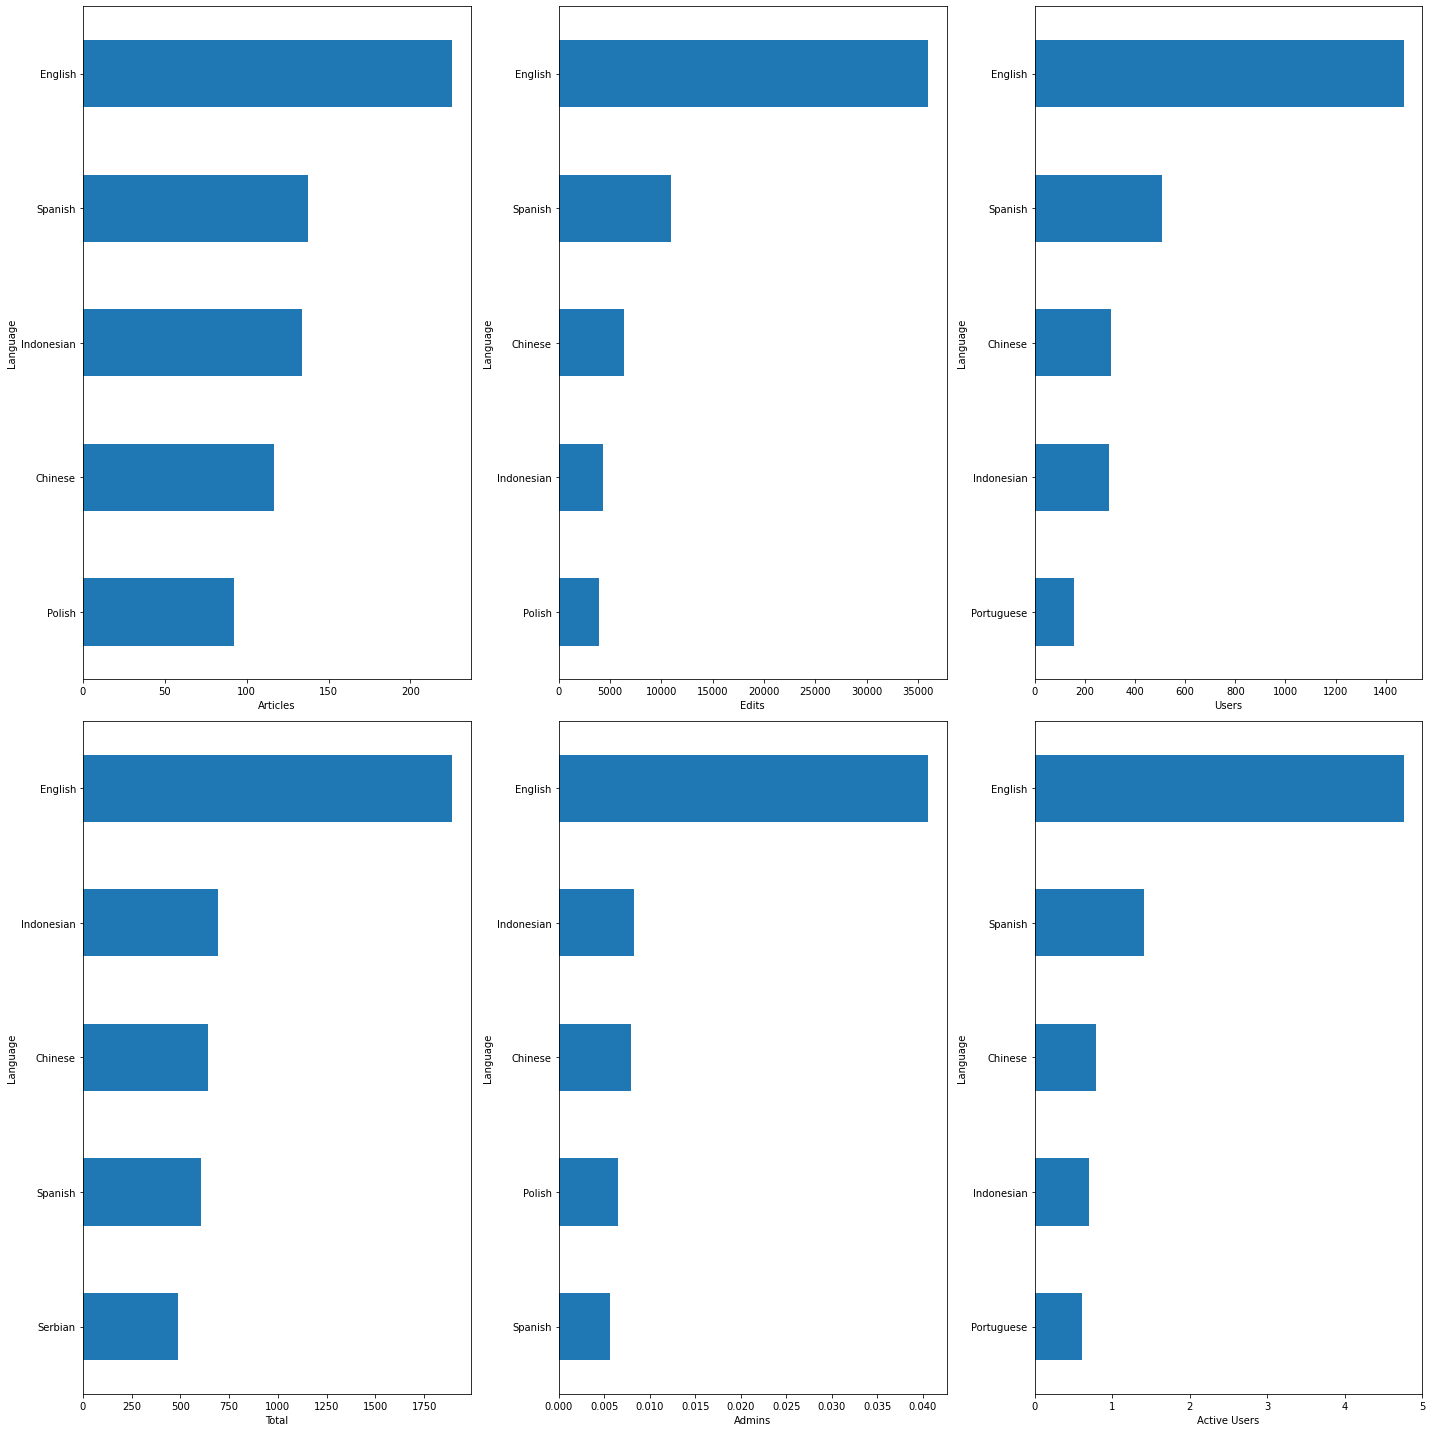

In [68]:
#visualize groups by languages
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 20))
df_ratio_bigger['ratio_Articles'].sort_values().tail(5).plot.barh(ax=axs[0,0])
axs[0,0].set_xlabel('Articles')
df_ratio_bigger['ratio_Total'].sort_values().tail(5).plot.barh(ax=axs[1,0])
axs[1,0].set_xlabel('Total')
df_ratio_bigger['ratio_Edits'].sort_values().tail(5).plot.barh(ax=axs[0,1])
axs[0,1].set_xlabel('Edits')
df_ratio_bigger['ratio_Admins'].sort_values().tail(5).plot.barh(ax=axs[1,1])
axs[1,1].set_xlabel('Admins')
df_ratio_bigger['ratio_Users'].sort_values().tail(5).plot.barh(ax=axs[0,2])
axs[0,2].set_xlabel('Users')
df_ratio_bigger['ratio_Active_Users'].sort_values().tail(5).plot.barh(ax=axs[1,2])
axs[1,2].set_xlabel('Active Users')
plt.tight_layout()

<AxesSubplot:>

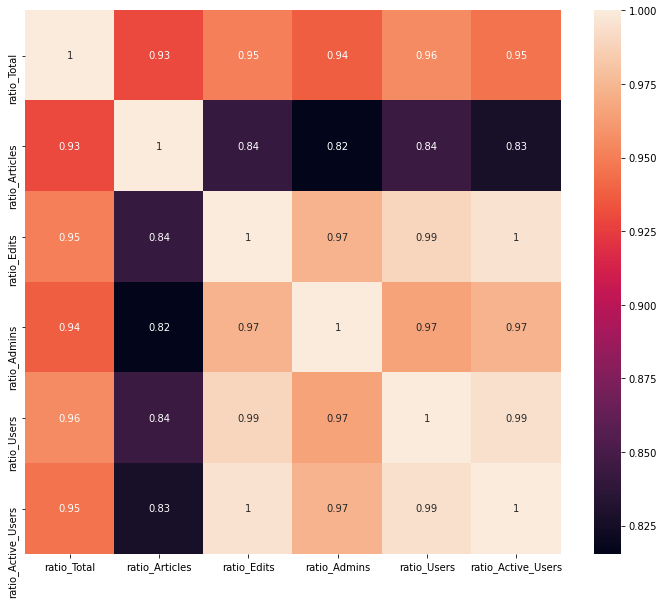

In [69]:
plt.figure(figsize=(12,10))
sns.heatmap(df_ratio_bigger.corr(), annot=True)